In [30]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [142]:
with open('result.json', 'r') as f:
    j = json.load(f)

In [150]:
arr = [list(dic.values())[0] for dic in j]

In [18]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [151]:
def rollavg(a, n):
    assert n%2 == 1
    r, N = int(n/2), len(a)
    res = []
    for i in range(N):
        ar = np.bincount(a[max(i-r,0):min(i+r+1,N)])
        if len(ar)==3:
            if ar[1]==ar[2]:
                ar[2] += 1
        res.append(np.argmax(ar))
    return res #[np.argmax(np.bincount(a[max(i-r,0):min(i+r+1,N)])) for i in range(N)]

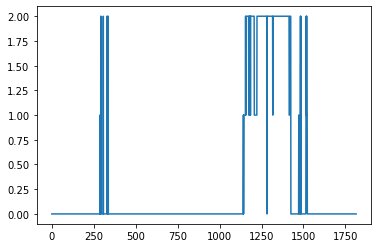

In [70]:
plt.plot(arr)
plt.show()

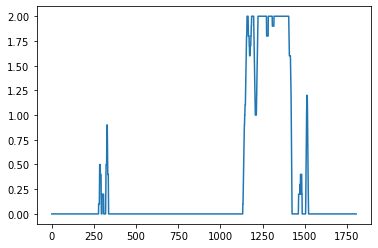

In [71]:
plt.plot(moving_average(arr, 10))
plt.show()

In [149]:
rollavg(arr, 9)[1510:1525]

[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0]

In [158]:
rollavg(arr, 9)[1510:1525]

[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0]

In [157]:
arr[1510:1525]

[0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0]

In [97]:
j2 = j.copy()
for d, a in zip(j2, rollavg(arr, 9)):
    d.update((k, a) for k, v in d.items())

In [98]:
j2[1510:1525]

[{'20200904_174236_cr_0000001510.jpg': 0},
 {'20200904_174236_cr_0000001511.jpg': 0},
 {'20200904_174236_cr_0000001512.jpg': 0},
 {'20200904_174236_cr_0000001513.jpg': 0},
 {'20200904_174236_cr_0000001514.jpg': 0},
 {'20200904_174236_cr_0000001515.jpg': 0},
 {'20200904_174236_cr_0000001516.jpg': 2},
 {'20200904_174236_cr_0000001517.jpg': 2},
 {'20200904_174236_cr_0000001518.jpg': 1},
 {'20200904_174236_cr_0000001519.jpg': 1},
 {'20200904_174236_cr_0000001520.jpg': 2},
 {'20200904_174236_cr_0000001521.jpg': 0},
 {'20200904_174236_cr_0000001522.jpg': 0},
 {'20200904_174236_cr_0000001523.jpg': 0},
 {'20200904_174236_cr_0000001524.jpg': 0}]

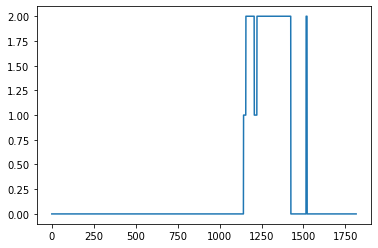

In [155]:
plt.plot(rollavg(arr, 9))
plt.show()

In [138]:
a = np.array([0, 1, 2, 1, 2, 2, 2, 1, 1])
counts = np.bincount(a)
print(counts)
print(np.argmax((counts)))

[1 4 4]
1
